In [1]:
from models.model2_linear import Dynamic_Bicycle_Linear
from models.model4_joel import FourWheelModel_load_transfer
from models.model2 import BicycleModel
from models.model4 import FourWheelModel
from models.utils import fit_circle
import matplotlib.pyplot as plt

Bycicle radius: 53.37863195414858
Four wheel radius: 55.54986484090331
Bycicle Linear: 7.3846282201926625
Theoretical radius for kinematic model 7.585623609657709


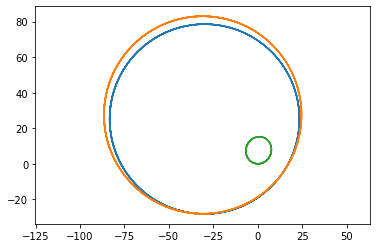

In [11]:
def get_circle_radius(model):
    
    t0 = 0
    N = model.open_loop_tf/model.dt
    
    steering = 0.2
    torque = 1000
    
    inputs = [steering, torque, torque, torque, torque]


    t,x_vect = model.do_open_loop_sim_cst_inputs(t0, inputs)
    
    x = x_vect[int(N/2):,0]
    y = x_vect[int(N/2):,1]

    radius = fit_circle(x, y)
    plt.plot(x,y)
    plt.axis('equal')
    return radius,t,x,y

dt = 0.05
open_loop_tf = 50

T_peak = 0.37
T_slope = 0.5



model2 = BicycleModel(dt,open_loop_tf, T_peak, T_slope)
radius2,t,x,y = get_circle_radius(model2)
print('Bycicle radius:', radius2)


model4 = FourWheelModel_load_transfer(dt,open_loop_tf, T_peak, T_slope)
radius4,t,x,y = get_circle_radius(model4)
print('Four wheel radius:', radius4)

velocity = 5
model2_lin = Dynamic_Bicycle_Linear(velocity, dt, open_loop_tf, T_peak, T_slope)
radius2_lin,t,x,y = get_circle_radius(model2_lin)
print('Bycicle Linear:', radius2_lin)

radius_kinematic = model4.kinematik_model_radius(0.2)
print('Theoretical radius for kinematic model', radius_kinematic)




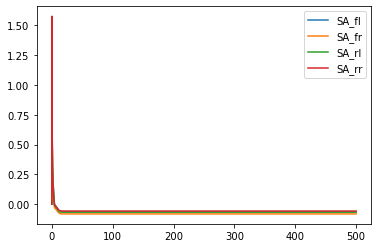

In [3]:
import numpy as np
#plt.plot(model4.t, model4.slip_angles[:,3])


model4.slip_angles

indices_to_remove = []
for i in range(model4.slip_angles.shape[0]):
    if i == 0:
        continue
    if not(i%4 == 0):
        indices_to_remove.append(i)
 
# Create a boolean mask
mask = np.ones(model4.slip_angles.shape[0], dtype=bool)
mask[indices_to_remove] = False

# Select rows using the mask
new_arr = model4.slip_angles[mask]


#plt.plot(model4.t, model4.slip_angles[:,0])
new_arr.shape
plt.plot(t, new_arr[:,0], label = 'SA_fl')
plt.plot(t, new_arr[:,1], label = 'SA_fr')
plt.plot(t, new_arr[:,2], label = 'SA_rl')
plt.plot(t, new_arr[:,3], label = 'SA_rr')
plt.legend()


In [6]:
class BaseClass:
    def common_function(self):
        print("Base class common function")

class SubClass(BaseClass):
    def common_function(self):
        super().common_function()  # Call base class common_function()
        print("Subclass common function")

# Creating an instance of SubClass
obj = SubClass()
obj.common_function()

Base class common function
Subclass common function


In [4]:
import numpy as np

def generate_points_around_circle(center_x, center_y, radius, num_points):
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    x = center_x + radius * np.cos(angles)
    y = center_y + radius * np.sin(angles)
    points = np.column_stack((x, y))
    
    return points


In [5]:
circle_points = generate_points_around_circle(0, 0, 5, 100)
print(circle_points)

[[ 5.00000000e+00  0.00000000e+00]
 [ 4.99013364e+00  3.13952598e-01]
 [ 4.96057351e+00  6.26666168e-01]
 [ 4.91143625e+00  9.36906573e-01]
 [ 4.84291581e+00  1.24344944e+00]
 [ 4.75528258e+00  1.54508497e+00]
 [ 4.64888243e+00  1.84062276e+00]
 [ 4.52413526e+00  2.12889646e+00]
 [ 4.38153340e+00  2.40876837e+00]
 [ 4.22163963e+00  2.67913397e+00]
 [ 4.04508497e+00  2.93892626e+00]
 [ 3.85256621e+00  3.18711995e+00]
 [ 3.64484314e+00  3.42273553e+00]
 [ 3.42273553e+00  3.64484314e+00]
 [ 3.18711995e+00  3.85256621e+00]
 [ 2.93892626e+00  4.04508497e+00]
 [ 2.67913397e+00  4.22163963e+00]
 [ 2.40876837e+00  4.38153340e+00]
 [ 2.12889646e+00  4.52413526e+00]
 [ 1.84062276e+00  4.64888243e+00]
 [ 1.54508497e+00  4.75528258e+00]
 [ 1.24344944e+00  4.84291581e+00]
 [ 9.36906573e-01  4.91143625e+00]
 [ 6.26666168e-01  4.96057351e+00]
 [ 3.13952598e-01  4.99013364e+00]
 [-8.04061325e-16  5.00000000e+00]
 [-3.13952598e-01  4.99013364e+00]
 [-6.26666168e-01  4.96057351e+00]
 [-9.36906573e-01  4